# Simple convolutional neural network to perform classification.


The project focuses on developing and comparing image classification models using convolutional neural networks (CNNs). First, we build a custom CNN model from scratch, train it on a chosen dataset, and evaluate its performance. Next, we fine-tune two pre-trained state-of-the-art models, such as ResNet or AlexNet, and compare their performance with our custom model.

The goal of this is to understand the trade-offs between designing a CNN from scratch and using pre-trained models through transfer learning. From this we get a chance to explore key concepts like network architecture, activation functions, optimizers, and overfitting, while analyzing how different models handle image classification tasks.

### 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


### 2.Loading the Dataset using ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
image_segmentation = fetch_ucirepo(id=50) 
  
# data (as pandas dataframes) 
X = image_segmentation.data.features 
y = image_segmentation.data.targets 
  
# metadata 
print(image_segmentation.metadata) 
  
# variable information 
print(image_segmentation.variables) 


{'uci_id': 50, 'name': 'Image Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/50/image+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/50/data.csv', 'abstract': 'Image data described by high-level numeric-valued attributes, 7 classes', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2310, 'num_features': 19, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5GP4N', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The instances were drawn randomly from a database of 7 outdoor images.  The images were handsegmented to create a classification for every pixel.  \r\n\r\n   Each instance is a 3x3 region.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_dat

### 3.Preprocessing the Data

In [6]:
# Encode labels and convert to categorical format
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize the data without reshaping (using 1D features)
X_normalized = X.values.astype('float32') / 255.0

c:\Users\prave\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


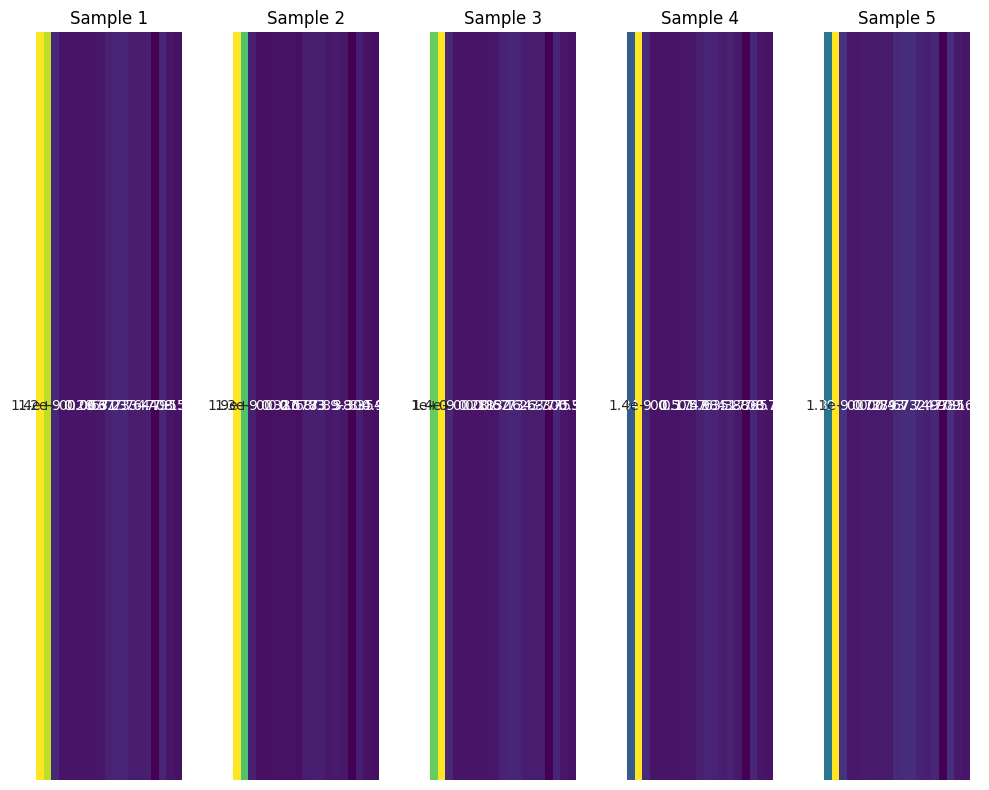